In [ ]:
import numpy as np
def Hot (Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y
 
y=[0,9,8]
y=np.array(y)
o=Hot(y)
print(o)

In [ ]:
!pip3 install -q idx2numpy
import random
import gzip
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import idx2numpy
import numpy as np

In [ ]:
X_train = idx2numpy.convert_from_file('/content/drive/MyDrive/IvLabs/mnist/train-images.idx3-ubyte')

Y_train = idx2numpy.convert_from_file('/content/drive/MyDrive/IvLabs/mnist/train-labels.idx1-ubyte')

X_test = idx2numpy.convert_from_file('/content/drive/MyDrive/IvLabs/mnist/t10k-images.idx3-ubyte')

Y_test = idx2numpy.convert_from_file('/content/drive/MyDrive/IvLabs/mnist/t10k-labels.idx1-ubyte')

dataset=X_train

# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)


# cv2_imshow(X_train[90])
# cv2_imshow(X_test[31])
# print(Y_test[31])
# print(Y_train[90])
#Xtrain and Ytrain have same number in image and digit
#same for Xtest and Ytest

#correcting dimensions:
X_train=X_train.reshape(X_train.shape[0],-1).T
#print(X_train.shape)
#784*60k

Y_train=Y_train.reshape(1,Y_train.shape[0])
#print(Y_train.shape)
#1*60k

X_test=X_test.reshape(X_test.shape[0],-1).T
#print(X_test.shape)
#784*10k

Y_test=Y_test.reshape(1,Y_test.shape[0])
#print(Y_test.shape)
#1*10k

#standardise:
X_train=X_train/255
X_test=X_test/255





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''Mini batches'''

X_mini={}
Y_mini={}
for i in range(59):
  
  X_mini['X'+str(i+1)]=X_train[:,1024*i:1024*i+1024]
  Y_mini['Y'+str(i+1)]=Y_train[:,1024*i:1024*i+1024]

#i is from 1 to 59, not 0 to 58.

#print(len(Y_mini))
#print(len(X_mini))
#result of above 2 is 59

#print(X_mini['X1'].shape)=784*1024
#print(Y_mini['Y1'].shape[0])
#print(Y_mini['Y1'].shape[1])
#result is 1, 1024 resp
#shape[0] is always 1. shape[1] is 1024 for i=1 to 58
#for i=59, remaining examples are 608


In [ ]:
#returns size of input,hidden,output layer

def layer_sizes(X_train, Y_train):
  nx=X_train.shape[0]
  nh=387
  ny=10

  return (nx,nh,ny)

nx,nh,ny=layer_sizes(X_train,Y_train)
# print(nx,nh,ny)

In [ ]:
def ini_para(nx,nh,ny):
  np.random.seed(2)
  W1=np.random.rand(nh,nx)*0.01
  b1=np.zeros((nh,1))
  W2=np.random.rand(ny,nh)*0.01
  b2=np.zeros((ny,1))

  assert(W1.shape==(nh,nx))
  assert(b1.shape==(nh,1))
  assert(W2.shape==(ny,nh))
  assert(b2.shape==(ny,1))

  parameters={"W1":W1,
              "b1":b1,
              "W2":W2,
              "b2":b2}


  return parameters

parameters=ini_para(nx,nh,ny)
#print(parameters)
      

  

In [ ]:
def relu(x):
  return x*(x>0)

In [ ]:
def softmax(Z):

  S=Z-np.max(Z,axis=0)
  i=np.exp(S)
  summ=np.sum(i,axis=0)
  ans=i/summ

  return ans

In [ ]:
def fp(X_train,parameters):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]

  Z1=np.dot(W1,X_train)+b1
  A1=relu(Z1)
  Z2=np.dot(W2,A1)+b2
  A2=softmax(Z2)

  #print(A2.shape)
  #result is 10*60k

  cache={
      "Z1":Z1,
      "A1":A1,
      "Z2":Z2,
      "A2":A2}

  return A2, cache

#A2, cache=fp(X_train, parameters)
#print(np.mean(cache['Z1']))



In [ ]:
def compute_cost(A2,Y_train,parameters):
  m=Y_train.shape[1]
  buffer=1e-10
  #logprobs=np.multiply(np.log(A2+buffer),Y_train)+ np.multiply(np.log(1-A2+buffer),1-Y_train)
  logprobs=np.multiply(Y_train,np.log(A2+ buffer))
  cost=(-1/m)*np.sum(logprobs)

  cost=float(np.squeeze(cost))

  assert(isinstance(cost,float))
  return cost

#cost=compute_cost(A2,Y_train,parameters)
#print(cost)


In [ ]:
def Hot (Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y
#print(Hot(Y_mini['Y1']))


In [ ]:
def reluderiv(Z):
  return (1*(Z>0))

In [ ]:

def bp(parameters, cache, X_train,one_Y):
  m=X_train.shape[1]
  W1=parameters["W1"]
  W2=parameters["W2"]
  A1=cache["A1"]
  A2=cache["A2"]

  
  dZ2=cache["A2"]-one_Y
  dW2=1/m*(np.dot(dZ2,cache['A1'].T))
  db2=1/m*(np.sum(dZ2,axis=1,keepdims=True))
  temp=reluderiv(cache['Z1'])

  dZ1=np.dot(W2.T,dZ2)*temp
  dW1=1/m*(np.dot(dZ1,X_train.T))
  db1=1/m*(np.sum(dZ1,axis=1,keepdims=True))



  grads={"dW1":dW1,
         "dW2":dW2,
         "dZ1":dZ1,
         "dZ2":dZ2,
         "db1":db1,
         "db2":db2}

  return grads

#grads=bp(parameters, cache, X_train, Y_train)

In [ ]:
def up(parameters,grads, lr=0.01):
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]

  dW1=grads['dW1']
  db1=grads['db1']
  dW2=grads['dW2']
  db2=grads['db2']

  W1=W1-lr*dW1
  b1=b1-lr*db1
  W2=W2-lr*dW2
  b2=b2-lr*db2

  parameters={'W1':W1,
              'W2':W2,
              'b1':b1,
              'b2':b2}

  return parameters

#parameters=up(parameters, grads, lr=0.01)

In [ ]:



def nn(X_mini, Y_mini,it, printcost=False):
  
  
  np.random.seed(3)
  nx,nh,ny=layer_sizes(X_mini['X1'], Y_mini['Y1'])
  parameters=ini_para(nx,nh,ny)
  costs=[]
  its=[]

  for i in range(0,it):
     for j in range(1,60):
        one_Y=Hot(Y_mini['Y'+str(j)])
        A2, cache=fp(X_mini['X'+str(j)], parameters)
        cost=compute_cost(A2,one_Y,parameters)
        grads=bp(parameters, cache,X_mini['X'+str(j)], one_Y)
        parameters=up(parameters,grads,lr=0.05)
        costs.append(cost)
        if printcost and j%10==0:
             print(i," ",j," ","cost= ",cost)
          #print(i, cost)

       
  plt.xlabel('Itrations per 10')
  plt.ylabel('Cost')
  plt.plot(costs)
  plt.show()
  return parameters



0   10   cost=  2.2769194985128567
0   20   cost=  2.282130092097621
0   30   cost=  2.274296171236927
0   40   cost=  2.2585112759429755
0   50   cost=  2.2536147704385487
1   10   cost=  2.1911883996516925
1   20   cost=  2.1563908324073484
1   30   cost=  2.114489892981153
1   40   cost=  1.99812601847708
1   50   cost=  1.9119230011640203
2   10   cost=  1.6341740699899643
2   20   cost=  1.4925203262383977
2   30   cost=  1.479462340494252
2   40   cost=  1.2577958390520405
2   50   cost=  1.2129071110754985
3   10   cost=  1.028474883658437
3   20   cost=  0.9509648991408728
3   30   cost=  1.045785506748586
3   40   cost=  0.8447640014861817
3   50   cost=  0.8744369739385927
4   10   cost=  0.7630519842044825
4   20   cost=  0.7168239851239417
4   30   cost=  0.8410549744413649
4   40   cost=  0.6533092548371198
4   50   cost=  0.7165713003813663
5   10   cost=  0.6308942538437263
5   20   cost=  0.5961916663804677
5   30   cost=  0.7270459552996287
5   40   cost=  0.5485170927

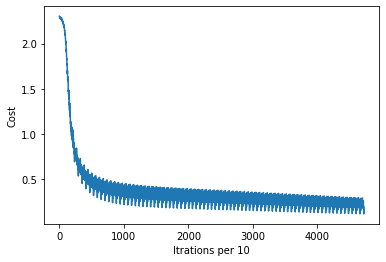

In [ ]:
parameters=nn(X_mini,Y_mini,80,True)

looks like  1


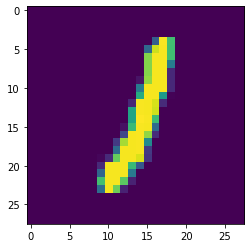

In [ ]:
i=np.random.randint(1,60000)

img=X_train[:,i:i+1]
lab=Y_train[:, i:i+1]
#print(X_train.shape)=784*60000

res,c=fp(img, parameters)
plt.imshow(dataset[i,:,:])
print("looks like ", np.argmax(res))



In [ ]:
def predict(x,y,parameters):
  m=x.shape[1]
  co=0
  A2, cache=fp(x, parameters)
  pd=np.zeros((10,m))

  for i in range(m):
    n=np.argmax(A2[:,i:i+1],axis=0)
    pd[n,i]=1.0
    if (np.array_equal(pd[:,i:i+1],y[:,i:i+1])):
      co+=1
  acc=(co/m)*100
  return(acc)

onehot=Hot(Y_train)
print(predict(X_train, onehot, parameters))

94.15
